In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt

subspace_num = [1, 2, 4, 8, 0]
C3_untruthfulness = np.zeros((7,5))
C2_untruthfulness = np.zeros((7,5))
C1_untruthfulness = np.zeros((7,5))

In [16]:
algorithm_list = ["harmonica2degree", "harmonica3degree", "lime", "ks", "ig", "ih", "shaptaylor"]

all_algorithm_index_list = []

for algorithm in algorithm_list:
    files = glob(f"{algorithm}/*")
    exec(f"{algorithm}_index_list = []")
    for each in tqdm(files):
        index = each.split('/')[-1]
        eval(f"{algorithm}_index_list").append(index)
    all_algorithm_index_list.append(set(eval(f"{algorithm}_index_list")))

100%|██████████| 1000/1000 [00:00<00:00, 163425.05it/s]


In [17]:
all_algorithm_index_list[0].intersection_update(all_algorithm_index_list[1], all_algorithm_index_list[2])
common_index = all_algorithm_index_list[0]

In [19]:
for algorithm_index, algorithm in enumerate(algorithm_list):
    
    files = glob(f"{algorithm}/*")
    
    for C in [1,2,3]:
        for subspace_limit in [0, 1, 2, 4, 8]:
            exec(f"final_answer_output_C_{C}_subspace{subspace_limit} = []")
    
    for each in tqdm(files):
        index = each.split('/')[-1]
        if index in common_index:
            
            for C in [1,2,3]:
                
                for subspace_limit in [0, 1, 2, 4, 8]:
                    try:
                        exec(f"temp_answer_output{subspace_limit} = np.load('{algorithm}/{index}/testindex{index}_truthful_answer_C_{C}_subspace_{subspace_limit}_seed123.npy')")
                    except:
                        assert 1==0
                    else:
                        eval(f"final_answer_output_C_{C}_subspace{subspace_limit}").append(eval(f"temp_answer_output{subspace_limit}"))

    exec(f"{algorithm}L0_result = []")
    exec(f"{algorithm}L1_result = []")
    exec(f"{algorithm}L2_result = []")
    
    for C in [1,2,3]:
        for _i, subspace_limit in enumerate([1, 2, 4, 8, 0]):
            untruthfulness = 0
            for _answer in eval(f"final_answer_output_C_{C}_subspace{subspace_limit}"):
                untruthfulness += np.sum(_answer ** 2)
            eval(f"C{C}_untruthfulness")[algorithm_index][_i] = untruthfulness / len(eval(f"final_answer_output_C_{C}_subspace{subspace_limit}"))
    


  0%|          | 0/1000 [00:00<?, ?it/s]

0.11573529340624135
0.09656084794459237
0.06814885770158241


  0%|          | 0/1000 [00:00<?, ?it/s]

0.09823413330085436
0.07947725101581506
0.04431524748007953


  1%|          | 7/1000 [00:00<00:15, 62.32it/s]

0.1592813821732998
0.1239403885602951
0.08443429724127054


  0%|          | 0/1000 [00:00<?, ?it/s]

0.0033568053245544432
-0.014782947629690171
-0.00705973494052887


  1%|          | 8/1000 [00:00<00:13, 71.42it/s]

0.022805635727448603
0.023700095172242284
-0.018143023989297558


  1%|          | 6/1000 [00:00<00:16, 59.76it/s]

0.3018981935364718
0.46489980765769723
0.20391982326997093


100%|██████████| 1000/1000 [00:16<00:00, 59.20it/s]


0.07267924984550336
0.04713677995780017
0.03630536748378654


In [20]:
print(C1_untruthfulness)
print(C2_untruthfulness)
print(C3_untruthfulness)

[[1.43205800e-02 6.50638163e-03 1.07000548e-03 8.44216182e-05
  7.44174820e-05]
 [9.74685796e-03 4.51647907e-03 7.45277558e-04 8.51519588e-05
  7.91754854e-05]
 [4.01266675e-02 2.22166121e-02 7.62889602e-03 9.30203589e-04
  3.79031212e-04]
 [3.48836494e-03 5.92679860e-03 5.72558744e-03 7.79076893e-04
  4.30561362e-04]
 [3.72012143e-03 6.85334484e-03 8.41251104e-03 5.33586420e-03
  4.77028506e-03]
 [9.48857996e-02 2.17133434e-01 3.15715502e-01 6.37569966e-02
  2.09171964e-02]
 [4.57693516e-03 4.85453829e-03 2.45137438e-03 2.01492070e-04
  1.99066709e-04]]
[[1.03059595e-02 3.44639155e-03 3.40478025e-04 4.85373423e-05
  4.49751544e-05]
 [6.97733371e-03 2.33548712e-03 2.48105690e-04 5.22197156e-05
  4.67709128e-05]
 [2.84022308e-02 1.12047449e-02 1.60660671e-03 1.71390132e-04
  1.41811064e-04]
 [2.83757900e-03 3.32381525e-03 1.22009026e-03 1.66520678e-04
  1.39335236e-04]
 [3.38363800e-03 4.73224008e-03 3.18110665e-03 4.18435147e-04
  2.18435079e-04]
 [8.36895453e-02 1.35691041e-01 7.32074

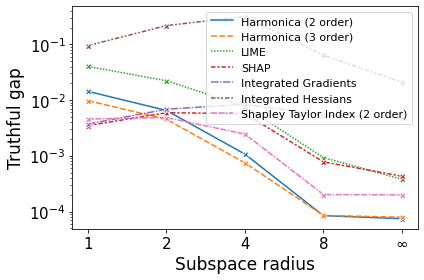

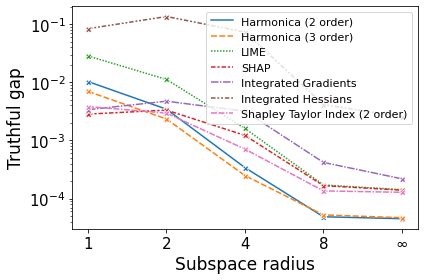

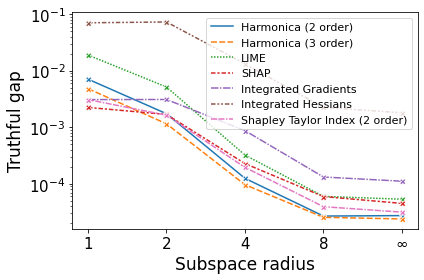

In [23]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

index = ["1","2","4","8","∞"] 

for C in [1,2,3]:
    eval(f"C{C}_untruthfulness")
    plt.figure()
    df_L2 = pd.DataFrame(eval(f"C{C}_untruthfulness").T, index, ["Harmonica (2 order)", "Harmonica (3 order)", "LIME", "SHAP", "Integrated Gradients", "Integrated Hessians", "Shapley Taylor Index (2 order)"]) 

    ax_L2 = sns.lineplot(data=df_L2, marker='X') 
    # ax_L2.set(xlabel='Subspace radius', ylabel='Readable inconsistency') 
    ax_L2.set(yscale='log')
    # ax_L2.set(ylim=[0,1])
    fig_L2 = ax_L2.get_figure() 
    ax_L2.legend(fontsize=11)
    plt.xlabel('Subspace radius', fontsize=17)
    plt.ylabel('Truthful gap', fontsize=17)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.tight_layout()
    fig_L2.savefig(f"truthful-gap-vision-plot-c{C}.pdf")

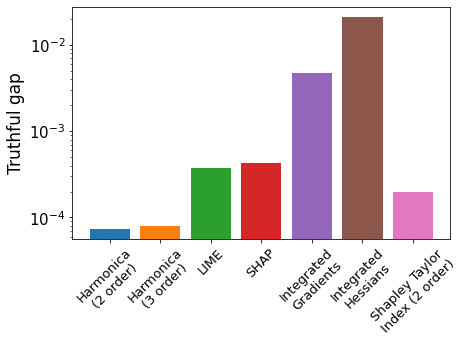

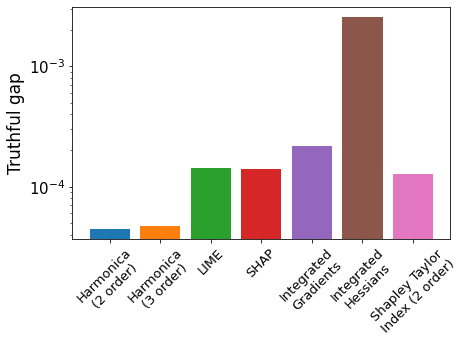

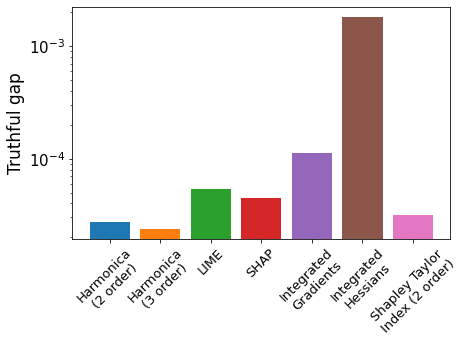

In [31]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt



for C in [1,2,3]:
    eval(f"C{C}_untruthfulness")
    # plt.figure(figsize=(8,8))
    plt.figure(figsize=(6.4, 5.2))
    plt.bar(["Harmonica\n(2 order)", "Harmonica\n(3 order)", "LIME", "SHAP", "Integrated\nGradients", "Integrated\nHessians", "Shapley Taylor\nIndex (2 order)"], 
            eval(f"C{C}_untruthfulness")[:, -1],
           color =['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',])
    plt.xticks(rotation=45, fontsize=13)
#     # ax_L2.set(yscale='log')
    plt.ylabel('Truthful gap', fontsize=17)
    plt.yticks(fontsize=15)
    # plt.tight_layout()
    plt.yscale('log')
    # if C==1:
    #     plt.ticklabel_format(axis='y', style='sci', scilimits=(-3,-3))
    # if C==2:
    #     plt.ticklabel_format(axis='y', style='sci', scilimits=(-4,-4))
    plt.subplots_adjust(left=0.15, bottom=0.26, right=0.97, top=None, wspace=None, hspace=None)
    plt.savefig(f"truthful-gap-vision-plot-c{C}.pdf")